In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

# Ignorando las advertencias
warnings.filterwarnings("ignore")

# Formato de los gráficos
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()

# Tamaño de los gráficos
sns.mpl.rc('figure', figsize=(12, 6))




In [22]:
data = sm.datasets.macrodata.load_pandas()
data = data.data
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


**Definiendo las variables endógenas**

In [23]:
Y = data[['realgdp', 'realint']] ## PIB y tasa de interes
Y['realgdp'] = Y['realgdp'].pct_change() ## como el PIB esta en millones, necesitamos el crecimiento de un año con respecto al otro.
Y['realint'] = Y['realint'].diff() / 100 ## Diferencias de la tasa de interes y se divide entre 100 para expresar en términos porcentuales
Y.dropna(inplace=True) ## Elimina los Nulis generados por las transformaciones
Y.head()

,realgdp,realint
1,0.025256,0.0074
2,-0.001192,0.0035
3,0.003501,0.0297
4,0.022438,-0.0287
5,-0.004674,0.0136


**Modelando realgdp y realint**

In [33]:
from statsmodels.tsa.api import VAR
model = VAR(Y) ## Estimo un VAR usando los datos contenidos en Y.
res = model.fit(maxlags=8, ic='bic') ## Prueba todos los modelos VAR con rezagos entre 1 y 8 y elige el mejor según el BIC.
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 18, Nov, 2025
Time:                     17:48:17
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -17.0130
Nobs:                     200.000    HQIC:                  -17.1112
Log likelihood:           1160.22    FPE:                3.46526e-08
AIC:                     -17.1779    Det(Omega_mle):     3.29829e-08
--------------------------------------------------------------------
Results for equation realgdp
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.004469         0.000871            5.130           0.000
L1.realgdp         0.263805         0.070174            3.759           0.000
L1.realint        -0.022077         0.025380           -0.870         

**Graficando las funciones impulso respuesta**


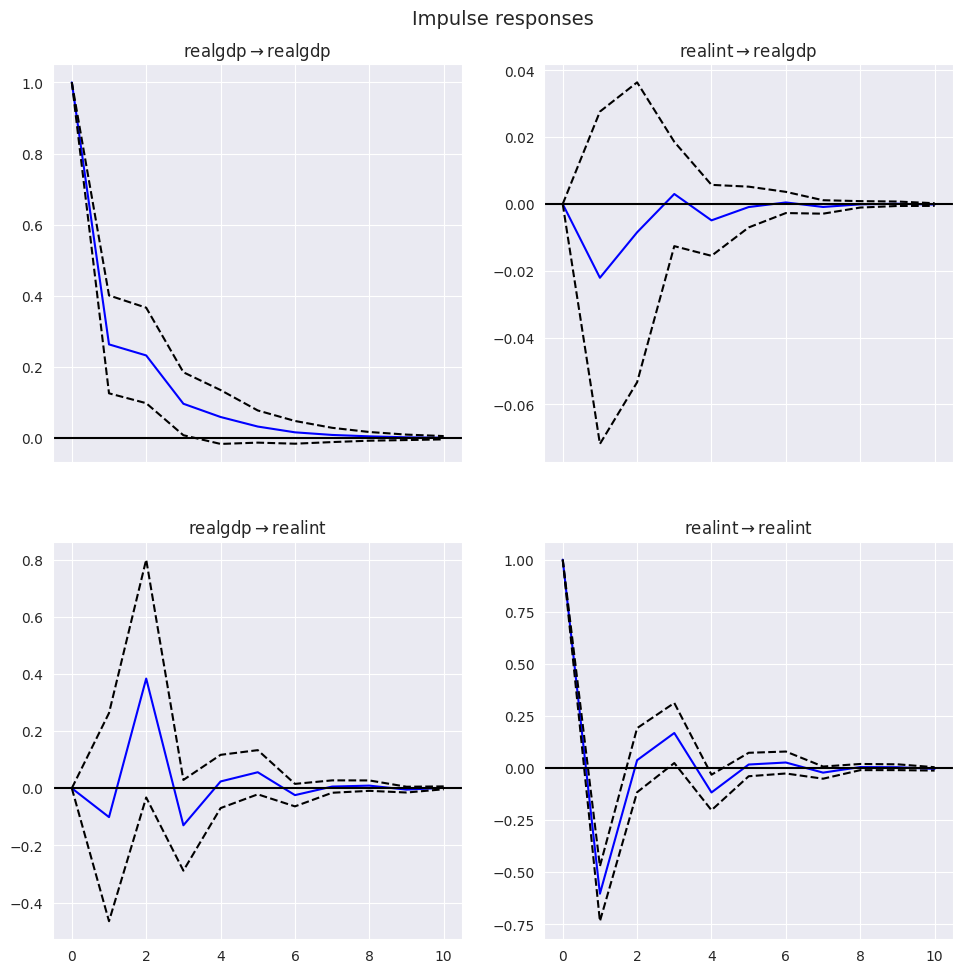

In [25]:
irf = res.irf(10)
fig = irf.plot(orth=False, seed=1)

**Estimación de un modelo VAR(2) de las variables realgdp and realint usando VARMAX**

**VARMAX=Vector AutoRegressive Moving Average with eXogenous regressors**

No se trabaja por OLS como el VAR si no por MLE, es decir maxima verosimilitud

In [34]:
mod = sm.tsa.VARMAX(Y, order=(2, 0), trend='c') ## VAR de 2 y MA de 0.
res = mod.fit(maxiter=3000, disp=False) ## Se desarrollan 3000 iteraciones.
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['realgdp', 'realint']   No. Observations:                  202
Model:                             VAR(2)   Log Likelihood                1169.963
                              + intercept   AIC                          -2313.926
Date:                    Tue, 18 Nov 2025   BIC                          -2270.919
Time:                            17:48:29   HQIC                         -2296.525
Sample:                                 0                                         
                                    - 202                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             0.06, 0.00   Jarque-Bera (JB):        16.04, 103.39
Prob(Q):                        0.80, 0.98   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.33, 2.40   Skew:                       0.16, 0.52
P

**Funciones impulso respuesta del modelo VAR(2)**

[]

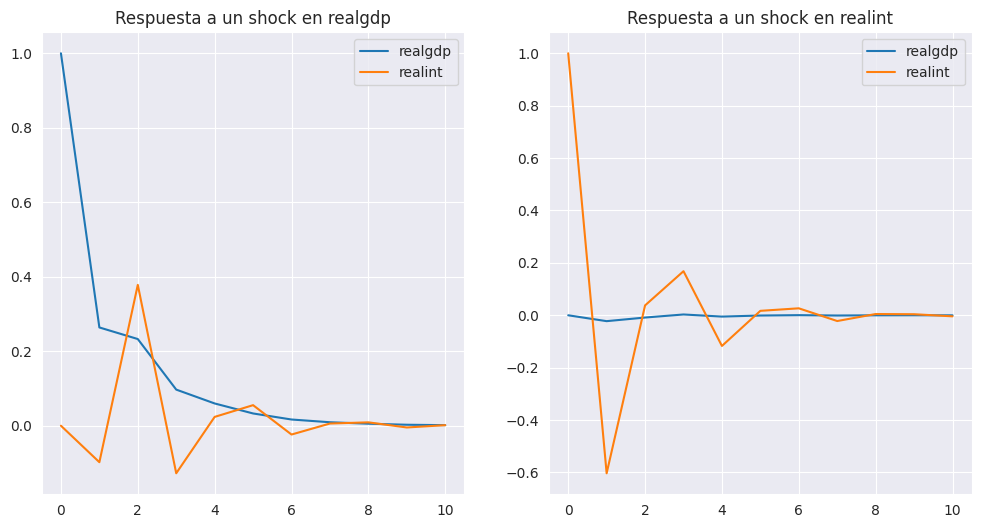

In [27]:
fig, ax = plt.subplots(1, 2)
# Respuesta a un shock en realgdp (impulse=0)
ax_0 = res.impulse_responses(steps=10,impulse=0,   # indica la variable con el shock
                             orthogonalized=False).plot(ax=ax[0])
ax[0].set_title('Respuesta a un shock en realgdp')

# Respuesta a un shock en realint (impulse=1)
ax_1 = res.impulse_responses(steps=10, impulse=1,   # indica la variable con el shock
                             orthogonalized=False).plot(ax=ax[1])
ax[1].set_title('Respuesta a un shock en realint')
plt.plot()
